22	**trace**	**traceback**	**pdb**


# `trace`: трассировка выполнения программы

Модуль trace может быть полезным для понимания того, как работает программа. Он позволяет наблюдать за выполнением, создавать отчеты о покрытии кода и исследовать отношения между функциями, вызывающими
одна другую.

Пример программы, который будет использован для обзора модуля (recurse.py)


In [ ]:
import sys
def recurse(level):
  print('recurse({})'.format(level))
  if level:
    recurse(level - 1)

  def not_called():
    print('This function is never called.')



def main():
  print('This is the main program.')
  recurse(2)
if __name__ == '__main__' :
  main()
  print(sys.argv)

This is the main program.
recurse(2)
recurse(1)
recurse(0)
['/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-2cb97761-b3d3-4bc6-8370-eec6340ffc82.json']


Модуль trace можно вызывать непосредственно из командной строки. Параметр --trace задает отображение строк кода по мере их выполнения.

In [ ]:
!python3 -m trace --trace 'recurse.py'

 --- modulename: recurse, funcname: <module>
recurse.py(1): import sys
recurse.py(2): def recurse(level):
recurse.py(12): def main():
recurse.py(15): if __name__ == '__main__' :
recurse.py(16):   main()
 --- modulename: recurse, funcname: main
recurse.py(13):   print('This is the main program.')
This is the main program.
recurse.py(14):   recurse(2)
 --- modulename: recurse, funcname: recurse
recurse.py(3):   print('recurse({})'.format(level))
recurse(2)
recurse.py(4):   if level:
recurse.py(5):     recurse(level - 1)
 --- modulename: recurse, funcname: recurse
recurse.py(3):   print('recurse({})'.format(level))
recurse(1)
recurse.py(4):   if level:
recurse.py(5):     recurse(level - 1)
 --- modulename: recurse, funcname: recurse
recurse.py(3):   print('recurse({})'.format(level))
recurse(0)
recurse.py(4):   if level:
recurse.py(7):   def not_called():
recurse.py(7):   def not_called():
recurse.py(7):   def not_called():
recurse.py(17):   print(sys.argv)
['recurse.py']
 --- modulename:

В результате запуска модуля trace из командной строки c указанием параметра --count создается отчет о покрытии кода, содержащий подробную информацию о том, какие строки выполняются, а какие пропускаются.


In [ ]:
!python3 -m trace --count 'recurse.py'

This is the main program.
recurse(2)
recurse(1)
recurse(0)
['recurse.py']


Результат выполнения выводится в файл с название *название запущенного файла*.cover


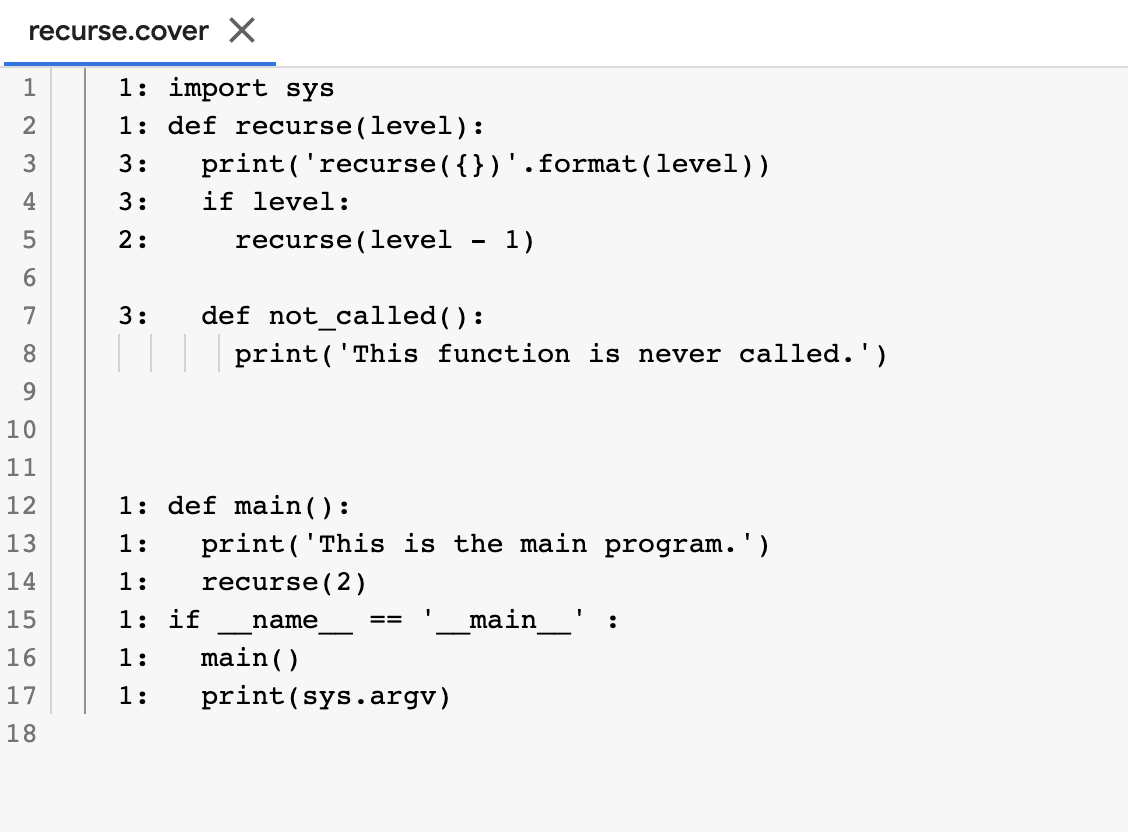

In [ ]:
from IPython.display import Image
Image(filename='screen1.png') 

Цифры слева - *количество выполнений строки*. Цифры на строке определения функций - количество определений.

# `traceback`: исключения и стек вызовов

Модуль traceback обрабатывает информацию о стеке вызовов для вывода сообщений об ошибках. Трассировочная информация содержит данные о стеке вызовов, начиная c точки вызова обработчика исключения и далее до той точки в цепочке вызовов, в которой возникло исключение.

API модуля traceback сохраняет представление стека вызовов в экземплярах StackSummary и FrameSummary. Эти объекты могут конструироваться на основе трассировочного стека или текущего стека выполняемых вызовов и впоследствии обрабатываться одинаковым способом.

В примерах, приведенных в этом разделе, используется модуль test_traceback.py.

In [ ]:
import traceback
import sys
def produce_exception(recursion_level=2):
  sys.stdout.flush()
  if recursion_level:
    produce_exception(recursion_level - 1)
  else:
    raise RuntimeError()
def call_function(f, recursion_level=2):
  if recursion_level:
    return call_function(f, recursion_level - 1)
  else:
    return f()

Для работы c текущим стеком следует сконструировать объект StackSummary c помощью генератора фреймов на основе вспомогательной функции walk_stack().

In [ ]:
import traceback
import sys
from test_traceback import call_function
def f():
  summary = traceback.StackSummary.extract(traceback.walk_stack(None))
  print('-------\n'.join(summary.format()))
print('Вызов f() напрямую:')
f()

print('Вызов f() с глубины 3 уровней:')
call_function(f)

Вызов f() напрямую:
  File "<ipython-input-53-56a79101d674>", line 5, in f
    summary = traceback.StackSummary.extract(traceback.walk_stack(None))
-------
  File "<ipython-input-53-56a79101d674>", line 8, in <module>
    f()
-------
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
-------
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
-------
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
-------
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
-------
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute

Объект StackSummary — это итерируемый контейнер, хранящий экземпляры FrameSummary.

Каждый объект FrameSummary описывает фрейм стека, включая местоположение контекста выполнения в файлах исходного кода программы.

Класс TracebackException — это интерфейс для создания
объектов StackSummary в процессе обработки трассировочной информации.


In [ ]:
import traceback
import sys
from test_traceback import produce_exception
print('with no exception:')
exc_type, exc_value, exc_tb = sys.exc_info()
tbe = traceback.TracebackException(exc_type, exc_value, exc_tb)
print('------'.join(tbe.format()))
print('\nwith exception:')
try:
  produce_exception()
except Exception as err:
  exc_type, exc_value, exc_tb = sys.exc_info()
  tbe = traceback.TracebackException(
  exc_type, exc_value, exc_tb,
  )
  print('------'.join(tbe.format()))

  print('\nexception name:')
  print('-------'.join(tbe.format_exception_only()))

with no exception:
None: None


with exception:
Traceback (most recent call last):
------  File "<ipython-input-62-52d96b48b52e>", line 10, in <module>
    produce_exception()
------  File "/content/test_traceback.py", line 6, in produce_exception
    produce_exception(recursion_level - 1)
------  File "/content/test_traceback.py", line 6, in produce_exception
    produce_exception(recursion_level - 1)
------  File "/content/test_traceback.py", line 8, in produce_exception
    raise RuntimeError()
------RuntimeError


exception name:
RuntimeError



# `pdb`: интерактивный отладчик

Модуль pdb реализует интерактивную среду отладки для программ. Он поддерживает приостановку выполнения программы, просмотр значений переменных и выполнение программы в пошаговом режиме, тем самым предоставляя возможность разобраться в том, что именно делает код, и найти ошибки в логике работы программы.

Программа для теста этого модуля test_pdb1.py


In [ ]:
class MyObj:
  def __init__(self, num_loops):
    self.count = num_loops

  def go(self):
    for i in range(self.count):
      print(i)
    return

if __name__ == '__main__' :
  MyObj(5).go()

0
1
2
3
4


Запущенный из командной строки отладчик загружает указанный файл c исходным кодом и прекращает выполнение, как только встречается первая инструк­ция.

In [ ]:
!python3 -m pdb test_pdb1.py

> /content/test_pdb1.py(1)<module>()
-> class MyObj:
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) --KeyboardInterrupt--
(Pdb) --KeyboardInterrupt--
(Pdb) ^C


В случае длительно выполняющихся процессов, когда проблема может проявиться на поздних стадиях выполнения, гораздо удобнее запускать отладчик из программы c помощью функции set_trace().

In [ ]:
import pdb
class MyObj:
  def __init__(self, num_loops) :
    self.count = num_loops
  def go(self):
    for i in range(self.count):
      pdb.set_trace()       # на этой строке останавливается программа
      print(i)
    return
if __name__ == '__main__' :
  MyObj(5).go()

> <ipython-input-68-8f9d268b9cb2>(8)go()
-> print(i)
(Pdb) 
(Pdb) next
0
> <ipython-input-68-8f9d268b9cb2>(6)go()
-> for i in range(self.count):
(Pdb) next
> <ipython-input-68-8f9d268b9cb2>(7)go()
-> pdb.set_trace()
(Pdb) next
> <ipython-input-68-8f9d268b9cb2>(8)go()
-> print(i)
(Pdb) next
1
> <ipython-input-68-8f9d268b9cb2>(6)go()
-> for i in range(self.count):
(Pdb) next
> <ipython-input-68-8f9d268b9cb2>(7)go()
-> pdb.set_trace()
(Pdb) next
> <ipython-input-68-8f9d268b9cb2>(8)go()
-> print(i)
(Pdb) 



BdbQuit: ignored

Поставарийный вызов отладчика (test_pdb2.py):

In [ ]:
class MyObj:
  def __init__(self, num_loops):
    self.count = num_loops
  def go(self): 
    for i in range(self.num_loops): # тут возникнет исключение
      print(i)
    return

В этом примере попытка использовать некорректное имя атрибута приводит к возбуждению исключения AttributeError, в результате чего выполнение программы прекращается. Функция pm() ищет активный объект traceback, содержащий трассировочную информацию, и запускает отладчик в той точке стека вызовов, в которой возникло исключение.

In [ ]:
!python3

Python 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> from test_pdb2 import MyObj
>>> MyObj (5) . go ()
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
  File "/content/test_pdb2.py", line 5, in go
    for i in range(self.num_loops):
AttributeError: 'MyObj' object has no attribute 'num_loops'
>>> import pdb
>>> pdb.pm()
> /content/test_pdb2.py(5)go()
-> for i in range(self.num_loops):
(Pdb) 
(Pdb) --KeyboardInterrupt--
(Pdb) --KeyboardInterrupt--
(Pdb) ^C


Управление отладчиком:


* list (l) выводит контекст вокруг исследуемого фрейма (longlist(ll) выводит больше)


* source загружает и выводит на экран весь исходный программный код для произвольного класса, функции или модуля.

* up и down - перемещение по фреймам

* where выводит текущий фрейм

* args выводит все аргументы функции, активные в текущем фрейме.

* continue продолжает выполнение программы

* !%название_переменной%=%значение% позволяет менять значение переменной в момент выполнения программы

In [ ]:
#test_pdb3.py
import pdb

def recursive_function(n=5, output='to be printed'):
  if n > 0:
    recursive_function(n - 1)
  else:
    pdb.set_trace()
    print(output)
  return
if __name__ == '__main__' :
  recursive_function()

In [ ]:
!python3 -m pdb test_pdb3.py

> /content/test_pdb3.py(1)<module>()
-> import pdb
(Pdb) continue
> /content/test_pdb3.py(8)recursive_function()
-> print(output)
(Pdb) u
> /content/test_pdb3.py(5)recursive_function()
-> recursive_function(n - 1)
(Pdb) d
> /content/test_pdb3.py(8)recursive_function()
-> print(output)
(Pdb) list
  3  	def recursive_function(n=5, output='to be printed'):
  4  	  if n > 0:
  5  	    recursive_function(n - 1)
  6  	  else:
  7  	    pdb.set_trace()
  8  ->	    print(output)
  9  	  return
 10  	if __name__ == '__main__' :
 11  	  recursive_function()
[EOF]
(Pdb) continue
to be printed
The program finished and will be restarted
> /content/test_pdb3.py(1)<module>()
-> import pdb
(Pdb) continue
> /content/test_pdb3.py(8)recursive_function()
-> print(output)
(Pdb) args
n = 0
output = 'to be printed'
(Pdb) !output='changed_output"
*** SyntaxError: EOL while scanning string literal
(Pdb) !output='changed_output'
(Pdb) continue
changed_output
The program finished and will be restarted
> /content

дз:

1) что означает число на строке определения функции в отчете trace count?


2) разница между StackSummary и FrameSummary 


3) как изменить значение переменной в рантайме, используя pdb? 